In [2]:
from feature_extraction import *
from utils import read_bio_data
import matplotlib.pyplot as plt
import biosppy

/usr/local/var/pyenv/versions/3.6.1/envs/ecg_processing/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Biopluxで取得した心電データを読み込む

In [3]:
bio_data,sample_rate = read_bio_data("sample_data/opensignals_No.2_2018-08-03_17-34-59.txt")
print("サンプリングレート：",sample_rate,"Hz")


サンプリングレート： 100 Hz


In [4]:
bio_data.head()

,ECG,RESPIRATION,TEMP,EDA,TIME
0,-0.070312,-2.734375,31.962432,2.636719,1.533285e+09
1,-0.046875,-2.343750,31.962432,2.539062,1.533285e+09
2,-0.011719,-2.343750,31.962432,2.636719,1.533285e+09
3,0.000000,-2.343750,31.962432,2.539062,1.533285e+09
4,-0.011719,-2.343750,31.962432,2.636719,1.533285e+09


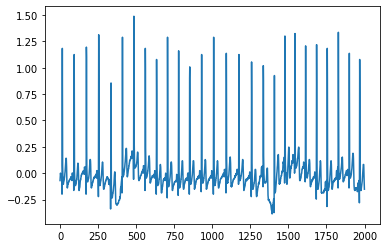

In [13]:
plt.plot(bio_data.ECG[:2000])

## 心拍特徴量算出

### 1. R ピーク検出

In [21]:
# R peak detection with library "Biosppy" :  https://biosppy.readthedocs.io/en/stable/biosppy.signals.html#biosppy-signals-ecg
rpeaks = biosppy.signals.ecg.christov_segmenter(signal=bio_data.ECG, sampling_rate=sample_rate)
rpeaks = np.squeeze(np.array(rpeaks))   # make sure tha rpeaks is a list or a numpy array with shape : (N,)

(0.0, 2000.0)

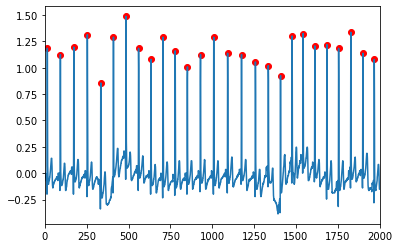

In [22]:
plt.plot(bio_data.ECG)
plt.scatter(rpeaks,np.array(bio_data.ECG)[rpeaks],color="r")
plt.xlim(0,2000)

### 2. 特徴量抽出

In [23]:
RRI = [float(rpeaks[i+1] - rpeaks[i])/float(sample_rate) for i in range(len(rpeaks)-1)]

In [29]:
features = extract_ecg_features_from_rri(RRI)

In [31]:
features

{'N': 2227,
 'RRI': 0.8262550516389763,
 'RRV': 0.004030250170933571,
 'CVNN': 205.013340759336,
 'pNN50': 0.1738544474393531,
 'RMSSD': 0.036999429344085295,
 'L': 0.08589096951053561,
 'T': 0.02616254719638968,
 'CVI': -2.648372,
 'CSI': 3.282974,
 'LF': 0.30587335777842867,
 'HF': 0.09538298362527389,
 'MF': 0.10753905838053202,
 'LF_HF': 4.3342365739271935,
 'HF_ratio': 0.18746825082483656,
 'HF_peak_power': 0.005045445320337626,
 'HF_peak_freq': 0.30078125}